In [1]:
import random
import numpy
import matplotlib.pyplot as plt
import pickle

from outlier_cleaner import outlierCleaner


In [2]:
### load up some practice data with outliers in it
ages = pickle.load( open("practice_outliers_ages.pkl", "r") )
net_worths = pickle.load( open("practice_outliers_net_worths.pkl", "r") )


In [58]:
### ages and net_worths need to be reshaped into 2D numpy arrays
### second argument of reshape command is a tuple of integers: (n_rows, n_columns)
### by convention, n_rows is the number of data points
### and n_columns is the number of features
ages       = numpy.reshape( numpy.array(ages), (len(ages), 1))
net_worths = numpy.reshape( numpy.array(net_worths), (len(net_worths), 1))
from sklearn.cross_validation import train_test_split
ages_train, ages_test, net_worths_train, net_worths_test = train_test_split(ages, net_worths, test_size=0.1, random_state=42)


In [4]:
### fill in a regression here!  Name the regression object reg so that
### the plotting code below works, and you can see what your regression looks like
from sklearn import linear_model
reg=linear_model.LinearRegression()
reg.fit(ages_train,net_worths_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

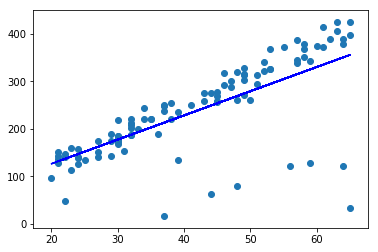

90


In [60]:
try:
    plt.plot(ages, reg.predict(ages), color="blue")
except NameError:
    pass
plt.scatter(ages, net_worths)
plt.show()
### identify and remove the most outlier-y points
cleaned_data = []
try:
    predictions = reg.predict(ages_train)
    cleaned_data = outlierCleaner( predictions, ages_train, net_worths_train )
except NameError:
    print "your regression object doesn't exist, or isn't name reg"
    print "can't make predictions to use in identifying outliers"






In [59]:
reg.coef_


array([[ 5.07793064]])

In [15]:
reg.intercept_


array([ 25.21002155])

In [19]:
reg.score(ages_test,net_worths_test)

0.8782624703664671

In [7]:
from sklearn.metrics import mean_squared_error

In [8]:
mean_squared_error(multioutput='raw_input')

TypeError: mean_squared_error() takes at least 2 arguments (1 given)

In [57]:
residual_err=[0]*len(ages)
len(residual_err)

100

In [50]:
a=[]*10
for i=0:9
    a[i]=i
    print a[i]

SyntaxError: invalid syntax (<ipython-input-50-0514a7a5b7eb>, line 2)

In [55]:
a=[1,2,3]
b=['a','s','d']
c=[a[0], b[0] ]
d=[a,b]
print c
print d

[1, 'a']
[[1, 2, 3], ['a', 's', 'd']]


In [91]:
#!/usr/bin/python


def outlierCleaner(predictions, ages, net_worths):
    """
        Clean away the 10% of points that have the largest
        residual errors (difference between the prediction
        and the actual net worth).

        Return a list of tuples named cleaned_data where 
        each tuple is of the form (age, net_worth, error).
    """
    cleaned_data = []

    residual_err=[0]*len(ages)
    c=[0]*len(ages)
    for i in range(0,len(ages)):
        residual_err[i] = abs(predictions[i]- net_worths[i] )
        c[i]=[ages[i],net_worths[i] ,residual_err[i]]
    c.sort(key= lambda tuple : tuple [2] )
    cleaned_data=c[:81]
    
    
    ### your code goes here

    
    return cleaned_data



In [119]:
residual_err=[0]*len(ages_train)
d=[]
c=[0]*len(ages_train)
for i in range(0,len(ages_train)):
    residual_err[i] = abs(predictions[i]- net_worths_train[i] )
    c[i]=[ages_train[i],net_worths[i] ,residual_err[i]]

c   
c.sort(key= lambda tuple : tuple [2] )

d=c[:5]
d
##########################################################################################

IndexError: index 81 is out of bounds for axis 0 with size 81

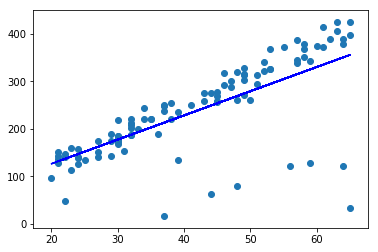

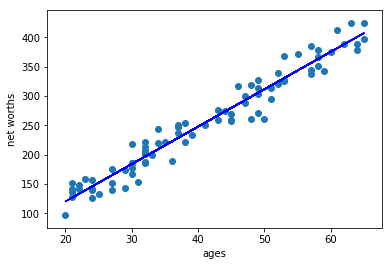

In [117]:
#!/usr/bin/python
""" Clean away the 10% of points that have the largest
     residual errors (difference between the prediction
     and the actual net worth).
     Return a list of tuples named cleaned_data where 
     each tuple is of the form (age, net_worth, error).
"""
import random
import numpy
import matplotlib.pyplot as plt
import pickle

from outlier_cleaner import outlierCleaner






### load up some practice data with outliers in it
ages = pickle.load( open("practice_outliers_ages.pkl", "r") )
net_worths = pickle.load( open("practice_outliers_net_worths.pkl", "r") )


def outlierCleaner(predictions, ages, net_worths):
    cleaned_data = []
    residual_err=[0]*len(ages)
    c=[0]*len(ages)
    for i in range(0,len(ages)):
        residual_err[i] = abs(predictions[i]- net_worths[i] )
        c[i]=[ages[i],net_worths[i] ,residual_err[i]]
    c.sort(key= lambda tuple : tuple [2] )
    cleaned_data=c[:81]
    
    
    ### your code goes here

    
    return cleaned_data
### ages and net_worths need to be reshaped into 2D numpy arrays
### second argument of reshape command is a tuple of integers: (n_rows, n_columns)
### by convention, n_rows is the number of data points
### and n_columns is the number of features
ages       = numpy.reshape( numpy.array(ages), (len(ages), 1))
net_worths = numpy.reshape( numpy.array(net_worths), (len(net_worths), 1))
from sklearn.cross_validation import train_test_split
ages_train, ages_test, net_worths_train, net_worths_test = train_test_split(ages, net_worths, test_size=0.1, random_state=42)

### fill in a regression here!  Name the regression object reg so that
### the plotting code below works, and you can see what your regression looks like
from sklearn import linear_model
reg=linear_model.LinearRegression()
reg.fit(ages_train,net_worths_train)










try:
    plt.plot(ages, reg.predict(ages), color="blue")
except NameError:
    pass
plt.scatter(ages, net_worths)
plt.show()

### identify and remove the most outlier-y points
cleaned_data = []
try:
    predictions = reg.predict(ages_train)
    cleaned_data = outlierCleaner( predictions, ages_train, net_worths_train )
    

except NameError:
    print "your regression object doesn't exist, or isn't name reg"
    print "can't make predictions to use in identifying outliers"







### only run this code if cleaned_data is returning data
if len(cleaned_data) > 0:
    ages, net_worths, errors = zip(*cleaned_data)
    ages       = numpy.reshape( numpy.array(ages), (len(ages), 1))
    net_worths = numpy.reshape( numpy.array(net_worths), (len(net_worths), 1))

    ### refit your cleaned data!
    try:
        reg.fit(ages, net_worths)
        plt.plot(ages, reg.predict(ages), color="blue")
    except NameError:
        print "you don't seem to have regression imported/created,"
        print "   or else your regression object isn't named reg"
        print "   either way, only draw the scatter plot of the cleaned data"
    plt.scatter(ages, net_worths)
    plt.xlabel("ages")
    plt.ylabel("net worths")
    plt.show()


else:
    print "outlierCleaner() is returning an empty list, no refitting to be done"


    

#!/usr/bin/python





In [120]:
########################### FUNCTION RULES ####################

In [121]:
reg.coef_

array([[ 6.36859481]])

In [124]:
reg.score(ages_test,net_worths_test)

0.98318945539553215

3

In [41]:
import numpy as np

x = np.array([[3, 1, 2],
            [3,45,6],[333,54,234]])
z=[0]*len(x)
y= np.array([[3, 2, 1],
            [4,5,6],[7,8,9]])
x= np.argsort(x)
for i in range(0,len(x)):
         z[i]=x[i][:2]
         q=list(y[z[i]]) 
q

[array([4, 5, 6]), array([7, 8, 9])]

## Now Working on Enron_Outliers.py

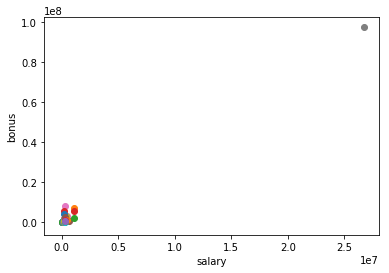

In [126]:
#!/usr/bin/python

import pickle
import sys
import matplotlib.pyplot
sys.path.append("../tools/")
from feature_format import featureFormat, targetFeatureSplit


### read in data dictionary, convert to numpy array
data_dict = pickle.load( open("../final_project/final_project_dataset.pkl", "r") )
features = ["salary", "bonus"]
data = featureFormat(data_dict, features)


### your code below



for point in data:
    salary = point[0]
    bonus = point[1]
    matplotlib.pyplot.scatter( salary, bonus )

matplotlib.pyplot.xlabel("salary")
matplotlib.pyplot.ylabel("bonus")
matplotlib.pyplot.show()


In [150]:
data_dict['TOTAL']

{'bonus': 97343619,
 'deferral_payments': 32083396,
 'deferred_income': -27992891,
 'director_fees': 1398517,
 'email_address': 'NaN',
 'exercised_stock_options': 311764000,
 'expenses': 5235198,
 'from_messages': 'NaN',
 'from_poi_to_this_person': 'NaN',
 'from_this_person_to_poi': 'NaN',
 'loan_advances': 83925000,
 'long_term_incentive': 48521928,
 'other': 42667589,
 'poi': False,
 'restricted_stock': 130322299,
 'restricted_stock_deferred': -7576788,
 'salary': 26704229,
 'shared_receipt_with_poi': 'NaN',
 'to_messages': 'NaN',
 'total_payments': 309886585,
 'total_stock_value': 434509511}

In [149]:
max=data_dict['ALLEN PHILLIP K']['bonus']
for key in data_dict:
    if (data_dict[key]['bonus'] != 'NaN') and (data_dict[key]['bonus'] > max):
        max=data_dict[key]['bonus']
        print max
        print key


8000000
LAVORATO JOHN J
97343619
TOTAL


## A quick way to remove a key-value pair from a dictionary is the following line: ------------------ " dictionary.pop( key, 0 )  " Write a line like this (you’ll have to modify the dictionary and key names, of course) and remove the outlier before calling featureFormat().

In [156]:
data_dict.pop('TOTAL',0)

0

In [159]:
data_dict['TOTAL']


KeyError: 'TOTAL'

In [160]:
##The Data Point Named "TOTAL" has been deletd from Data Set

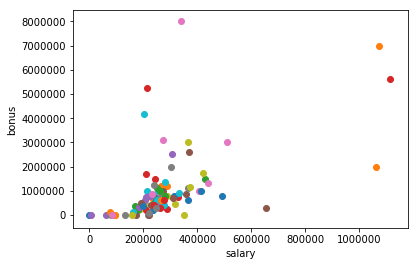

In [2]:
#!/usr/bin/python

import pickle
import sys
import matplotlib.pyplot
sys.path.append("../tools/")
from feature_format import featureFormat, targetFeatureSplit


### read in data dictionary, convert to numpy array
data_dict = pickle.load( open("../final_project/final_project_dataset.pkl", "r") )
features = ["salary", "bonus"]
#############################################################################
#DELETING THE 'TOTAL' DATA POINT AS DIRECTED TO BE CODED HERE!
############################################################################3
    
data_dict.pop('TOTAL',0)

####################################    
data = featureFormat(data_dict, features)


### your code below



for point in data:
    salary = point[0]
    bonus = point[1]
    matplotlib.pyplot.scatter( salary, bonus )

matplotlib.pyplot.xlabel("salary")
matplotlib.pyplot.ylabel("bonus")
matplotlib.pyplot.show()


In [4]:
for key in data_dict:
    if (data_dict[key]['exercised_stock_options'] != 'NaN') and (data_dict[key]['exercised_stock_options'] > 5000000 ) and data_dict[key]['salary'] > 1000000 :
        print key


LAY KENNETH L
SKILLING JEFFREY K


## Hence our answers are the names above 